<a href="https://colab.research.google.com/github/yanil-03/python/blob/main/CCA(Complete_case_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# from typing_extensions import dataclass_transform
# cca ---> complete case analysis

# df ---> missing data ---> filter missing data ---->
# new_df =  filtered_columns_in_which_we_have_missing_data

# new_df ---> missing_data_drop

# Architecture ---> histogram --->
# past column in which we have missing data
# updated column in which we have no missing data


# if past data architecture is overlapping to new data architecture --->
# it means we can drop missing data.

# if past data architecture is not overlapping to new data architecture --->
# it means we can not drop missing data.


In [53]:
import numpy as np
import pandas as pd


In [54]:
df = pd.read_csv("dsjob.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [55]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,0.000000
gender,23.860968
relevent_experience,0.000000
enrolled_university,1.456083
education_level,2.442461
major_discipline,14.654767
experience,0.234852
company_size,29.215594


In [56]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [57]:
df[cols].sample(5)

,enrolled_university,education_level,experience,last_new_job
132,no_enrollment,Masters,>20,1
1113,Full time course,Graduate,<1,1
943,no_enrollment,Primary School,19,>4
64,no_enrollment,Graduate,18,>4
1320,no_enrollment,Graduate,>20,1


In [58]:
len(df[cols].dropna()) / len(df)


0.9478628464067638

In [59]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((2129, 13), (2018, 4))

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

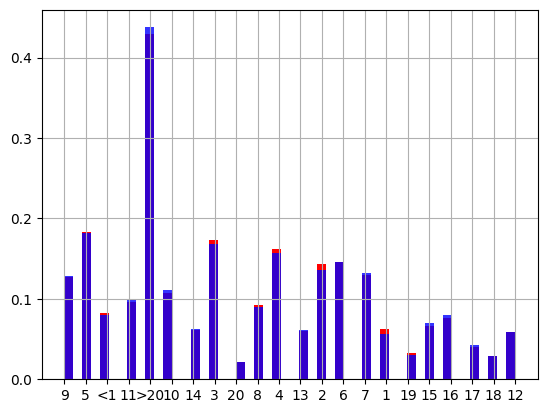

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)

# orignal data
df['experience'].hist(bins=50, ax = ax, density=True, color = 'red')

# data after cca, the argument alpha makes the color transparent , so we can see the overlay of the two distributions
new_df['experience'].hist(bins=50, ax = ax, density=True, color = 'blue', alpha = 0.8)

plt.show()

In [62]:
temp = pd.concat([
    # percentage of observations per category, orignal data
    df['enrolled_university'].value_counts()/ len(df),

    # percentage of observations per category, cca data
    new_df['enrolled_university'].value_counts()/ len(df),

],
                 axis =1)

# add column names
temp.columns = ['original_data', 'cca_data']

temp

,original_data,cca_data
enrolled_university,,
no_enrollment,0.713481,0.689995
Full time course,0.204321,0.191639
Part time course,0.067637,0.066228


#CCA on Covis data

In [63]:
df = pd.read_csv("covid_toy.csv")
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [64]:
df.isnull().mean()*100

,0
age,0.0
gender,0.0
fever,10.0
cough,0.0
city,0.0
has_covid,0.0


In [65]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.20 and df[var].isnull().mean() > 0]
cols

['fever']

In [66]:
len(df[cols].dropna()) / len(df)


0.9

In [67]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((100, 6), (90, 1))

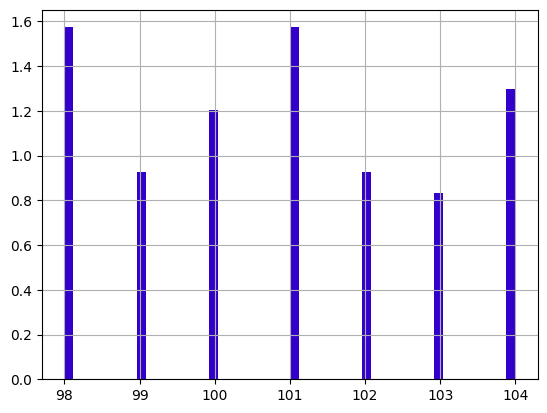

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)

# orignal data
df['fever'].hist(bins=50, ax = ax, density=True, color = 'red')

# data after cca, the argument alpha makes the color transparent , so we can see the overlay of the two distributions
new_df['fever'].hist(bins=50, ax = ax, density=True, color = 'blue', alpha = 0.8)

plt.show()

In [69]:
temp = pd.concat([
        # percentage of observations per category, original data
        df['fever'].value_counts() / len(df),

        # percentageobservtions ger category, cca data
        new_df['fever'].value_counts() / len(new_df)
    ],
    axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
fever,,
101.0,0.17,0.188889
98.0,0.17,0.188889
104.0,0.14,0.155556
100.0,0.13,0.144444
99.0,0.10,0.111111
102.0,0.10,0.111111
103.0,0.09,0.100000


#CCA on Titanic dataset

In [70]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
df.isnull().mean()*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.574163
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.239234


In [74]:
# cols = [var for var in df.columns if df[var].isnull().mean() < 0.50 and df[var].isnull().mean() > 0]
cols = [var for var in df.columns if df[var].isnull().mean() < 0.50 and df[var].isnull().mean() > 0.0]
cols

['Age', 'Fare']

In [75]:
df[cols].sample(5)

,Age,Fare
313,37.0,7.7500
310,18.0,8.6625
123,28.0,7.2500
13,63.0,26.0000
256,NaN,7.7500


In [76]:
len(df[cols].dropna()) / len(df)

0.7918660287081339

In [77]:
new_df = df[cols]. dropna()
df.shape, new_df.shape

((418, 12), (331, 2))

<Axes: >

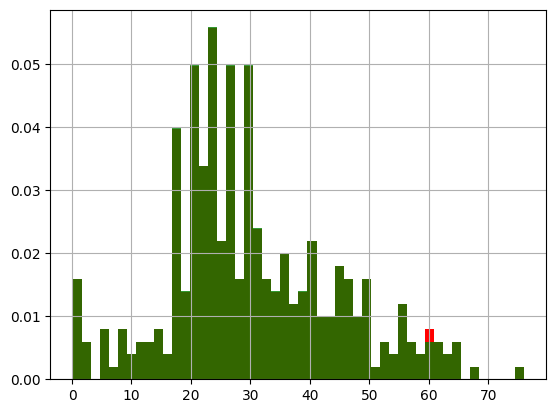

In [78]:
fig = plt.figure()
ax  = fig.add_subplot(111)

# original data
df['Age'].hist(bins= 50,ax=ax, density=True ,color='red')
# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['Age'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

In [79]:
temp = pd.concat([
        # percentage of observations per category, original data
        df['Age'].value_counts() / len(df),

        # percentageobservtions ger category, cca data
        new_df['Age'].value_counts() / len(new_df)
    ],
    axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Age,,
21.0,0.040670,0.051360
24.0,0.040670,0.051360
22.0,0.038278,0.048338
30.0,0.035885,0.045317
18.0,0.031100,0.039275
...,...,...
44.0,0.002392,0.003021
5.0,0.002392,0.003021
51.0,0.002392,0.003021
